In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving California.csv to California.csv


In [ ]:
df1 = pd.read_csv("California.csv")

In [ ]:
#Checking the dimensionality of the dataset
df1.shape

(20640, 10)

Feature Engineering

In [ ]:
#Dropping the column "latitude" and "longitude"
df1.drop(columns=["latitude"],axis=1, inplace = True)
df1.drop(columns=["longitude"],axis=1, inplace = True)


In [ ]:
# Create the 'rooms_per_household' feature
df1['rooms_per_household'] = df1['total_rooms'] / df1['households']

# Display the first few rows to verify
print(df1[['total_rooms', 'households', 'rooms_per_household']].head())

   total_rooms  households  rooms_per_household
0          880         126             6.984127
1         7099        1138             6.238137
2         1467         177             8.288136
3         1274         219             5.817352
4         1627         259             6.281853


In [ ]:
# Create the 'rooms_per_household' feature
df1['rooms_per_person'] = df1['total_rooms'] / df1['population']

# Display the first few rows to verify
print(df1[['total_rooms', 'population', 'rooms_per_person']].head())

   total_rooms  population  rooms_per_person
0          880         322          2.732919
1         7099        2401          2.956685
2         1467         496          2.957661
3         1274         558          2.283154
4         1627         565          2.879646


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Custom mapping for ocean_proximity
custom_mapping = {
    'ISLAND': 1,
    'NEAR OCEAN': 2,
    'NEAR BAY': 3,
    '<1H OCEAN': 4,
    'INLAND': 5
}

# Assuming your dataframe is called df
df1['ocean_proximity_encoded'] = df1['ocean_proximity'].map(custom_mapping)

# Verify the encoding
print(df1[['ocean_proximity', 'ocean_proximity_encoded']].head())



  ocean_proximity  ocean_proximity_encoded
0        NEAR BAY                        3
1        NEAR BAY                        3
2        NEAR BAY                        3
3        NEAR BAY                        3
4        NEAR BAY                        3


In [ ]:
#Dropping the column "ocean_proximity"
df1.drop(columns=["ocean_proximity"],axis=1, inplace = True)

In [ ]:
#Checking the dimensionality of the dataset after feature engineering
df1.shape

(20640, 10)

In [ ]:
#List of columns after dropping columns
df1.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'median_house_value',
       'rooms_per_household', 'rooms_per_person', 'ocean_proximity_encoded'],
      dtype='object')

Data Cleaning

In [ ]:
# Check for duplicate rows
duplicate_rows = df1[df1.duplicated()]

# Display duplicate rows, if any
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")


Number of duplicate rows: 0


In [ ]:
#Checking the number of null values in each column
df1.isnull().sum()

housing_median_age           0
total_rooms                  0
total_bedrooms             207
population                   0
households                   0
median_income                0
median_house_value           0
rooms_per_household          0
rooms_per_person             0
ocean_proximity_encoded      0
dtype: int64

In [ ]:
#Fill missing values with the most frequent value (mode)
df1['total_bedrooms'].fillna(df1['total_bedrooms'].mode()[0], inplace=True)

<ipython-input-29-d96927cb1747>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['total_bedrooms'].fillna(df1['total_bedrooms'].mode()[0], inplace=True)


In [ ]:
#Rechecking for null values
df1.isnull().sum()

housing_median_age         0
total_rooms                0
total_bedrooms             0
population                 0
households                 0
median_income              0
median_house_value         0
rooms_per_household        0
rooms_per_person           0
ocean_proximity_encoded    0
dtype: int64

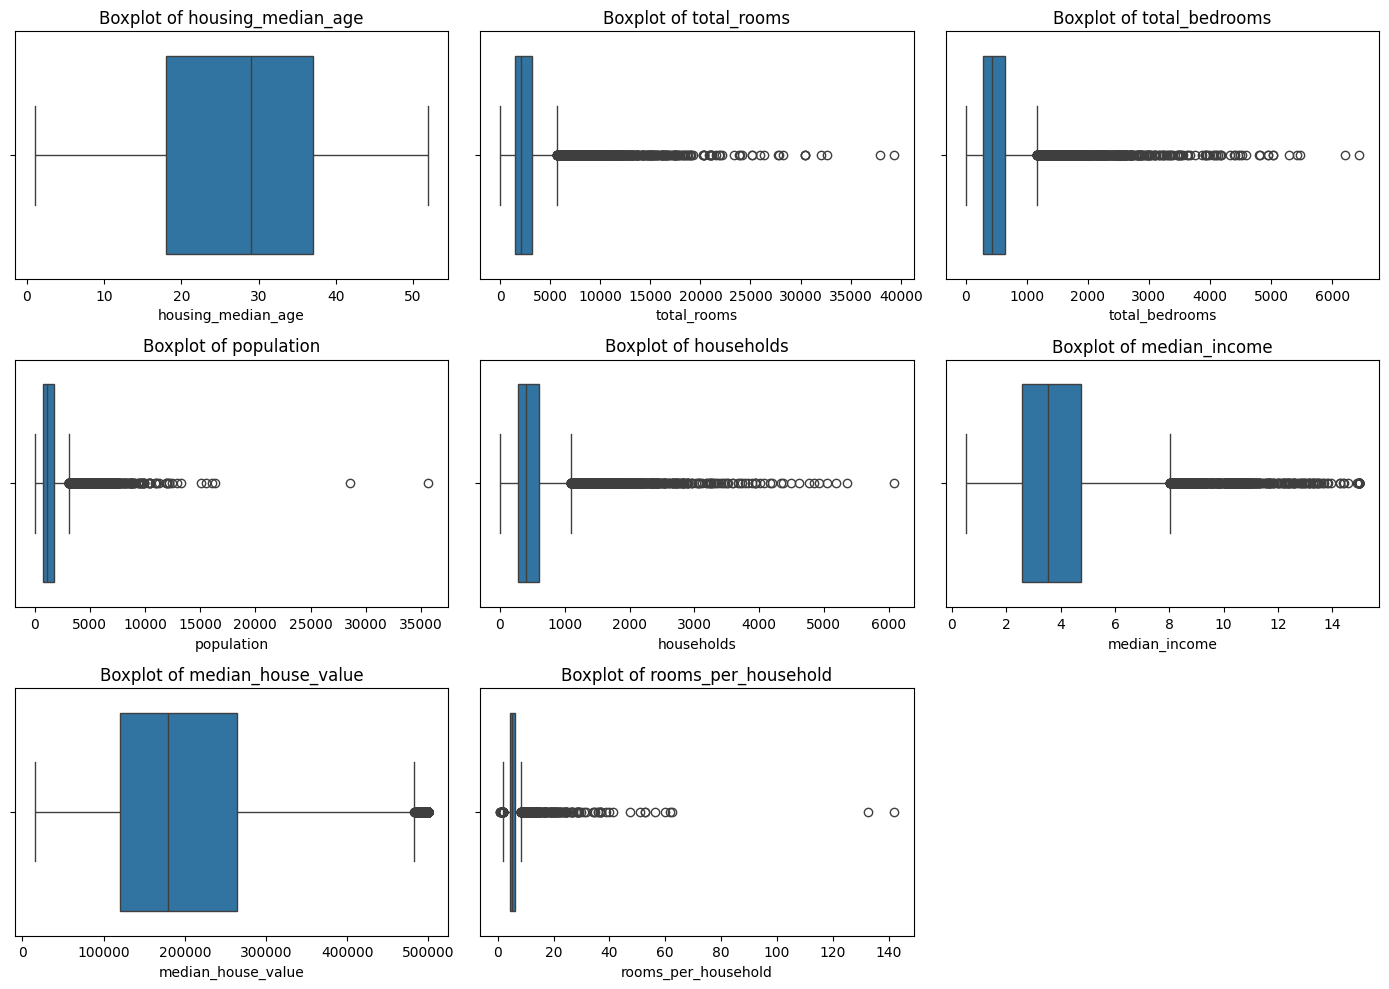

Number of outliers in housing_median_age: 0
Number of outliers in total_rooms: 1287
Number of outliers in total_bedrooms: 1279
Number of outliers in population: 1196
Number of outliers in households: 1220
Number of outliers in median_income: 681
Number of outliers in median_house_value: 1071
Number of outliers in rooms_per_household: 511


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is called df
house_price_features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households',
                        'median_income', 'median_house_value', 'rooms_per_household']

# Generate boxplots for the house pricing dataset
plt.figure(figsize=(14, 10))

for i, column in enumerate(house_price_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df1[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

# Detect outliers using the IQR method for the house pricing dataset
for column in house_price_features:
    Q1 = df1[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df1[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range (IQR)

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifying outliers
    outliers_iqr = (df1[column] < lower_bound) | (df1[column] > upper_bound)

    print(f"Number of outliers in {column}: {len(df1[outliers_iqr])}")



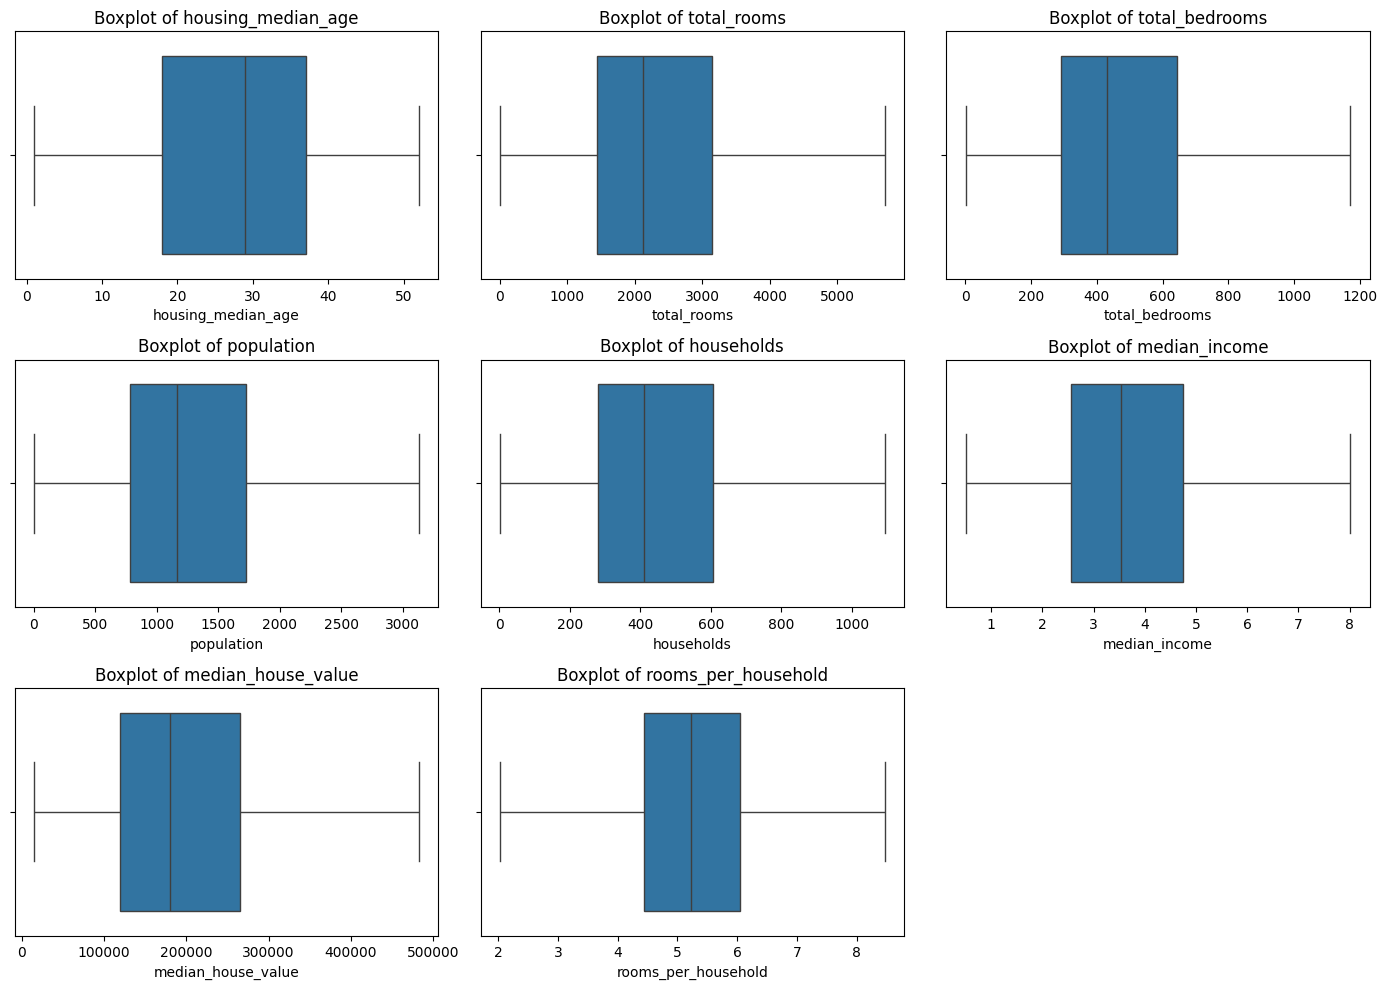

Number of outliers after clipping in housing_median_age: 0
Number of outliers after clipping in total_rooms: 0
Number of outliers after clipping in total_bedrooms: 0
Number of outliers after clipping in population: 0
Number of outliers after clipping in households: 0
Number of outliers after clipping in median_income: 0
Number of outliers after clipping in median_house_value: 0
Number of outliers after clipping in rooms_per_household: 0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is called df
house_price_features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households',
                        'median_income', 'median_house_value', 'rooms_per_household']

# Clipping the outliers in the house pricing dataset
for column in house_price_features:
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df1[column] = df1[column].clip(lower=lower_bound, upper=upper_bound)

# Generating boxplots for house price features after clipping
plt.figure(figsize=(14, 10))

for i, column in enumerate(house_price_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df1[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

# Calculating the IQR for house pricing features after clipping to detect remaining outliers
for column in house_price_features:
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_iqr = (df1[column] < lower_bound) | (df1[column] > upper_bound)
    print(f"Number of outliers after clipping in {column}: {len(df1[outliers_iqr])}")


Descriptive Analysis

In [ ]:
#Displaying the first 5 rows of the dataset
df1.head(5)

housing_median_age  total_rooms  total_bedrooms  population  households  \
0                  41      880.000           129.0         322       126.0   
1                  21     5698.375          1106.0        2401      1092.5   
2                  52     1467.000           190.0         496       177.0   
3                  52     1274.000           235.0         558       219.0   
4                  52     1627.000           280.0         565       259.0   

   median_income  median_house_value  rooms_per_household  rooms_per_person  \
0       8.013025            452600.0             6.984127          2.732919   
1       8.013025            358500.0             6.238137          2.956685   
2       7.257400            352100.0             8.288136          2.957661   
3       5.643100            341300.0             5.817352          2.283154   
4       3.846200            342200.0             6.281853          2.879646   

   ocean_proximity_encoded  
0                        3  
1                        3  
2                        3  
3                        3  
4                        3

In [ ]:
#Displaying the last 5 rows of the dataset
df1.tail(5)

housing_median_age  total_rooms  total_bedrooms  population  \
20635                  25       1665.0           374.0         845   
20636                  18        697.0           150.0         356   
20637                  17       2254.0           485.0        1007   
20638                  18       1860.0           409.0         741   
20639                  16       2785.0           616.0        1387   

       households  median_income  median_house_value  rooms_per_household  \
20635       330.0         1.5603             78100.0             5.045455   
20636       114.0         2.5568             77100.0             6.114035   
20637       433.0         1.7000             92300.0             5.205543   
20638       349.0         1.8672             84700.0             5.329513   
20639       530.0         2.3886             89400.0             5.254717   

       rooms_per_person  ocean_proximity_encoded  
20635          1.970414                        5  
20636          1.957865                        5  
20637          2.238332                        5  
20638          2.510121                        5  
20639          2.007931                        5

In [ ]:
#Displaying the datatypes of each column in the dataset
df1.dtypes

housing_median_age           int64
total_rooms                float64
total_bedrooms             float64
population                   int64
households                 float64
median_income              float64
median_house_value         float64
rooms_per_household        float64
rooms_per_person           float64
ocean_proximity_encoded      int64
dtype: object

In [ ]:
#Displaying a concise summary of the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   housing_median_age       20640 non-null  int64  
 1   total_rooms              20640 non-null  float64
 2   total_bedrooms           20640 non-null  float64
 3   population               20640 non-null  int64  
 4   households               20640 non-null  float64
 5   median_income            20640 non-null  float64
 6   median_house_value       20640 non-null  float64
 7   rooms_per_household      20640 non-null  float64
 8   rooms_per_person         20640 non-null  float64
 9   ocean_proximity_encoded  20640 non-null  int64  
dtypes: float64(7), int64(3)
memory usage: 1.6 MB


In [ ]:
#Displaying descriptive statistics for the numerical variables in the dataset
df1.describe()

housing_median_age   total_rooms  total_bedrooms    population  \
count        20640.000000  20640.000000    20640.000000  20640.000000   
mean            28.639486   2441.692472      500.097814   1336.959012   
std             12.585558   1397.790038      286.012398    765.550830   
min              1.000000      2.000000        1.000000      3.000000   
25%             18.000000   1447.750000      292.000000    787.000000   
50%             29.000000   2127.000000      431.000000   1166.000000   
75%             37.000000   3148.000000      643.250000   1725.000000   
max             52.000000   5698.375000     1170.125000   3132.000000   

         households  median_income  median_house_value  rooms_per_household  \
count  20640.000000   20640.000000        20640.000000         20640.000000   
mean     469.020107       3.801010       205981.224976             5.304740   
std      265.507540       1.657658       113217.350152             1.246177   
min        1.000000       0.499900        14999.000000             2.023219   
25%      280.000000       2.563400       119600.000000             4.440716   
50%      409.000000       3.534800       179700.000000             5.229129   
75%      605.000000       4.743250       264725.000000             6.052381   
max     1092.500000       8.013025       482412.500000             8.469878   

       rooms_per_person  ocean_proximity_encoded  
count      20640.000000             20640.000000  
mean           1.976970                 3.948159  
std            1.146020                 0.971081  
min            0.002547                 1.000000  
25%            1.522382                 4.000000  
50%            1.937936                 4.000000  
75%            2.296090                 5.000000  
max           55.222222                 5.000000

In [ ]:
# Select only numerical columns
numerical_columns = df1.select_dtypes(include=['float64', 'int64']).columns

# Calculate variance for each numerical variable
variance = df1[numerical_columns].var()

# Display the variance values
print('Variance\n\n',variance)

Variance

 housing_median_age         1.583963e+02
total_rooms                1.953817e+06
total_bedrooms             8.180309e+04
population                 5.860681e+05
households                 7.049425e+04
median_income              2.747829e+00
median_house_value         1.281817e+10
rooms_per_household        1.552956e+00
rooms_per_person           1.313361e+00
ocean_proximity_encoded    9.429977e-01
dtype: float64


Visualization

Text(0.5, 0, 'Diameter (cm)')

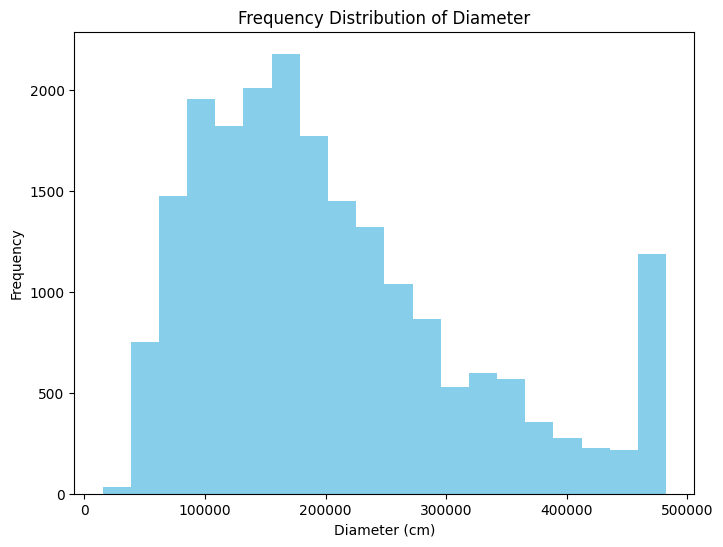

In [ ]:
#Plotting histograms median_house_value
ax = df1['median_house_value'].plot(kind='hist',
                          bins=20,
                          figsize=(8, 6),
                          color='skyblue',
                          title='Frequency Distribution of Diameter')
ax.set_xlabel('Diameter (cm)')

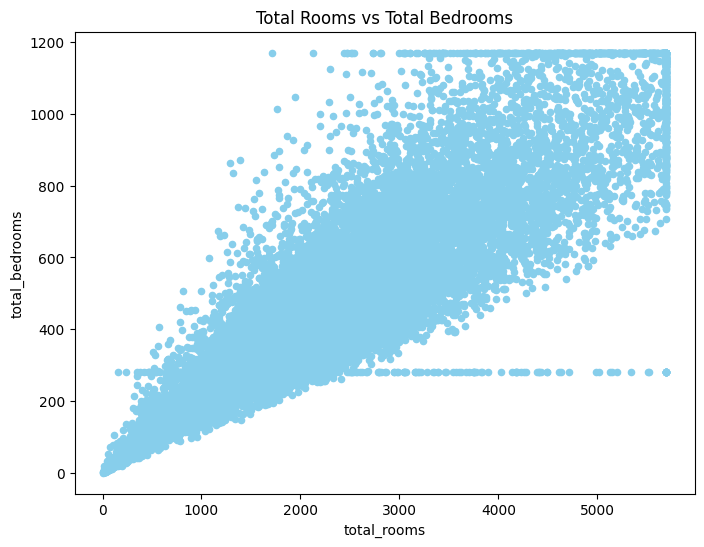

In [ ]:
#Plotting a scatterplot to visualize the relationship between Total Rooms & Total Bedrooms
df1.plot(kind='scatter',
        x='total_rooms',
        y='total_bedrooms',
        figsize=(8, 6),
        color='skyblue',
        title='Total Rooms vs Total Bedrooms')
plt.show()

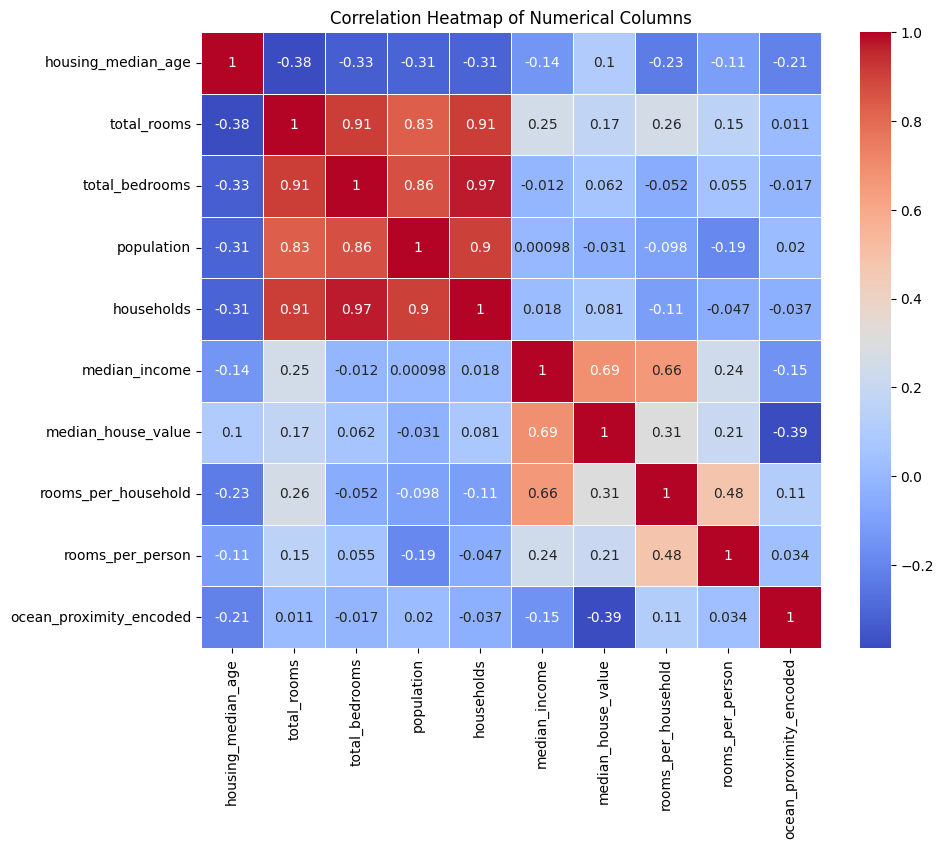

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is called df

# Select only numerical columns
numerical_columns = df1.select_dtypes(include=['float64', 'int64'])

# Plot the correlation heatmap for numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()


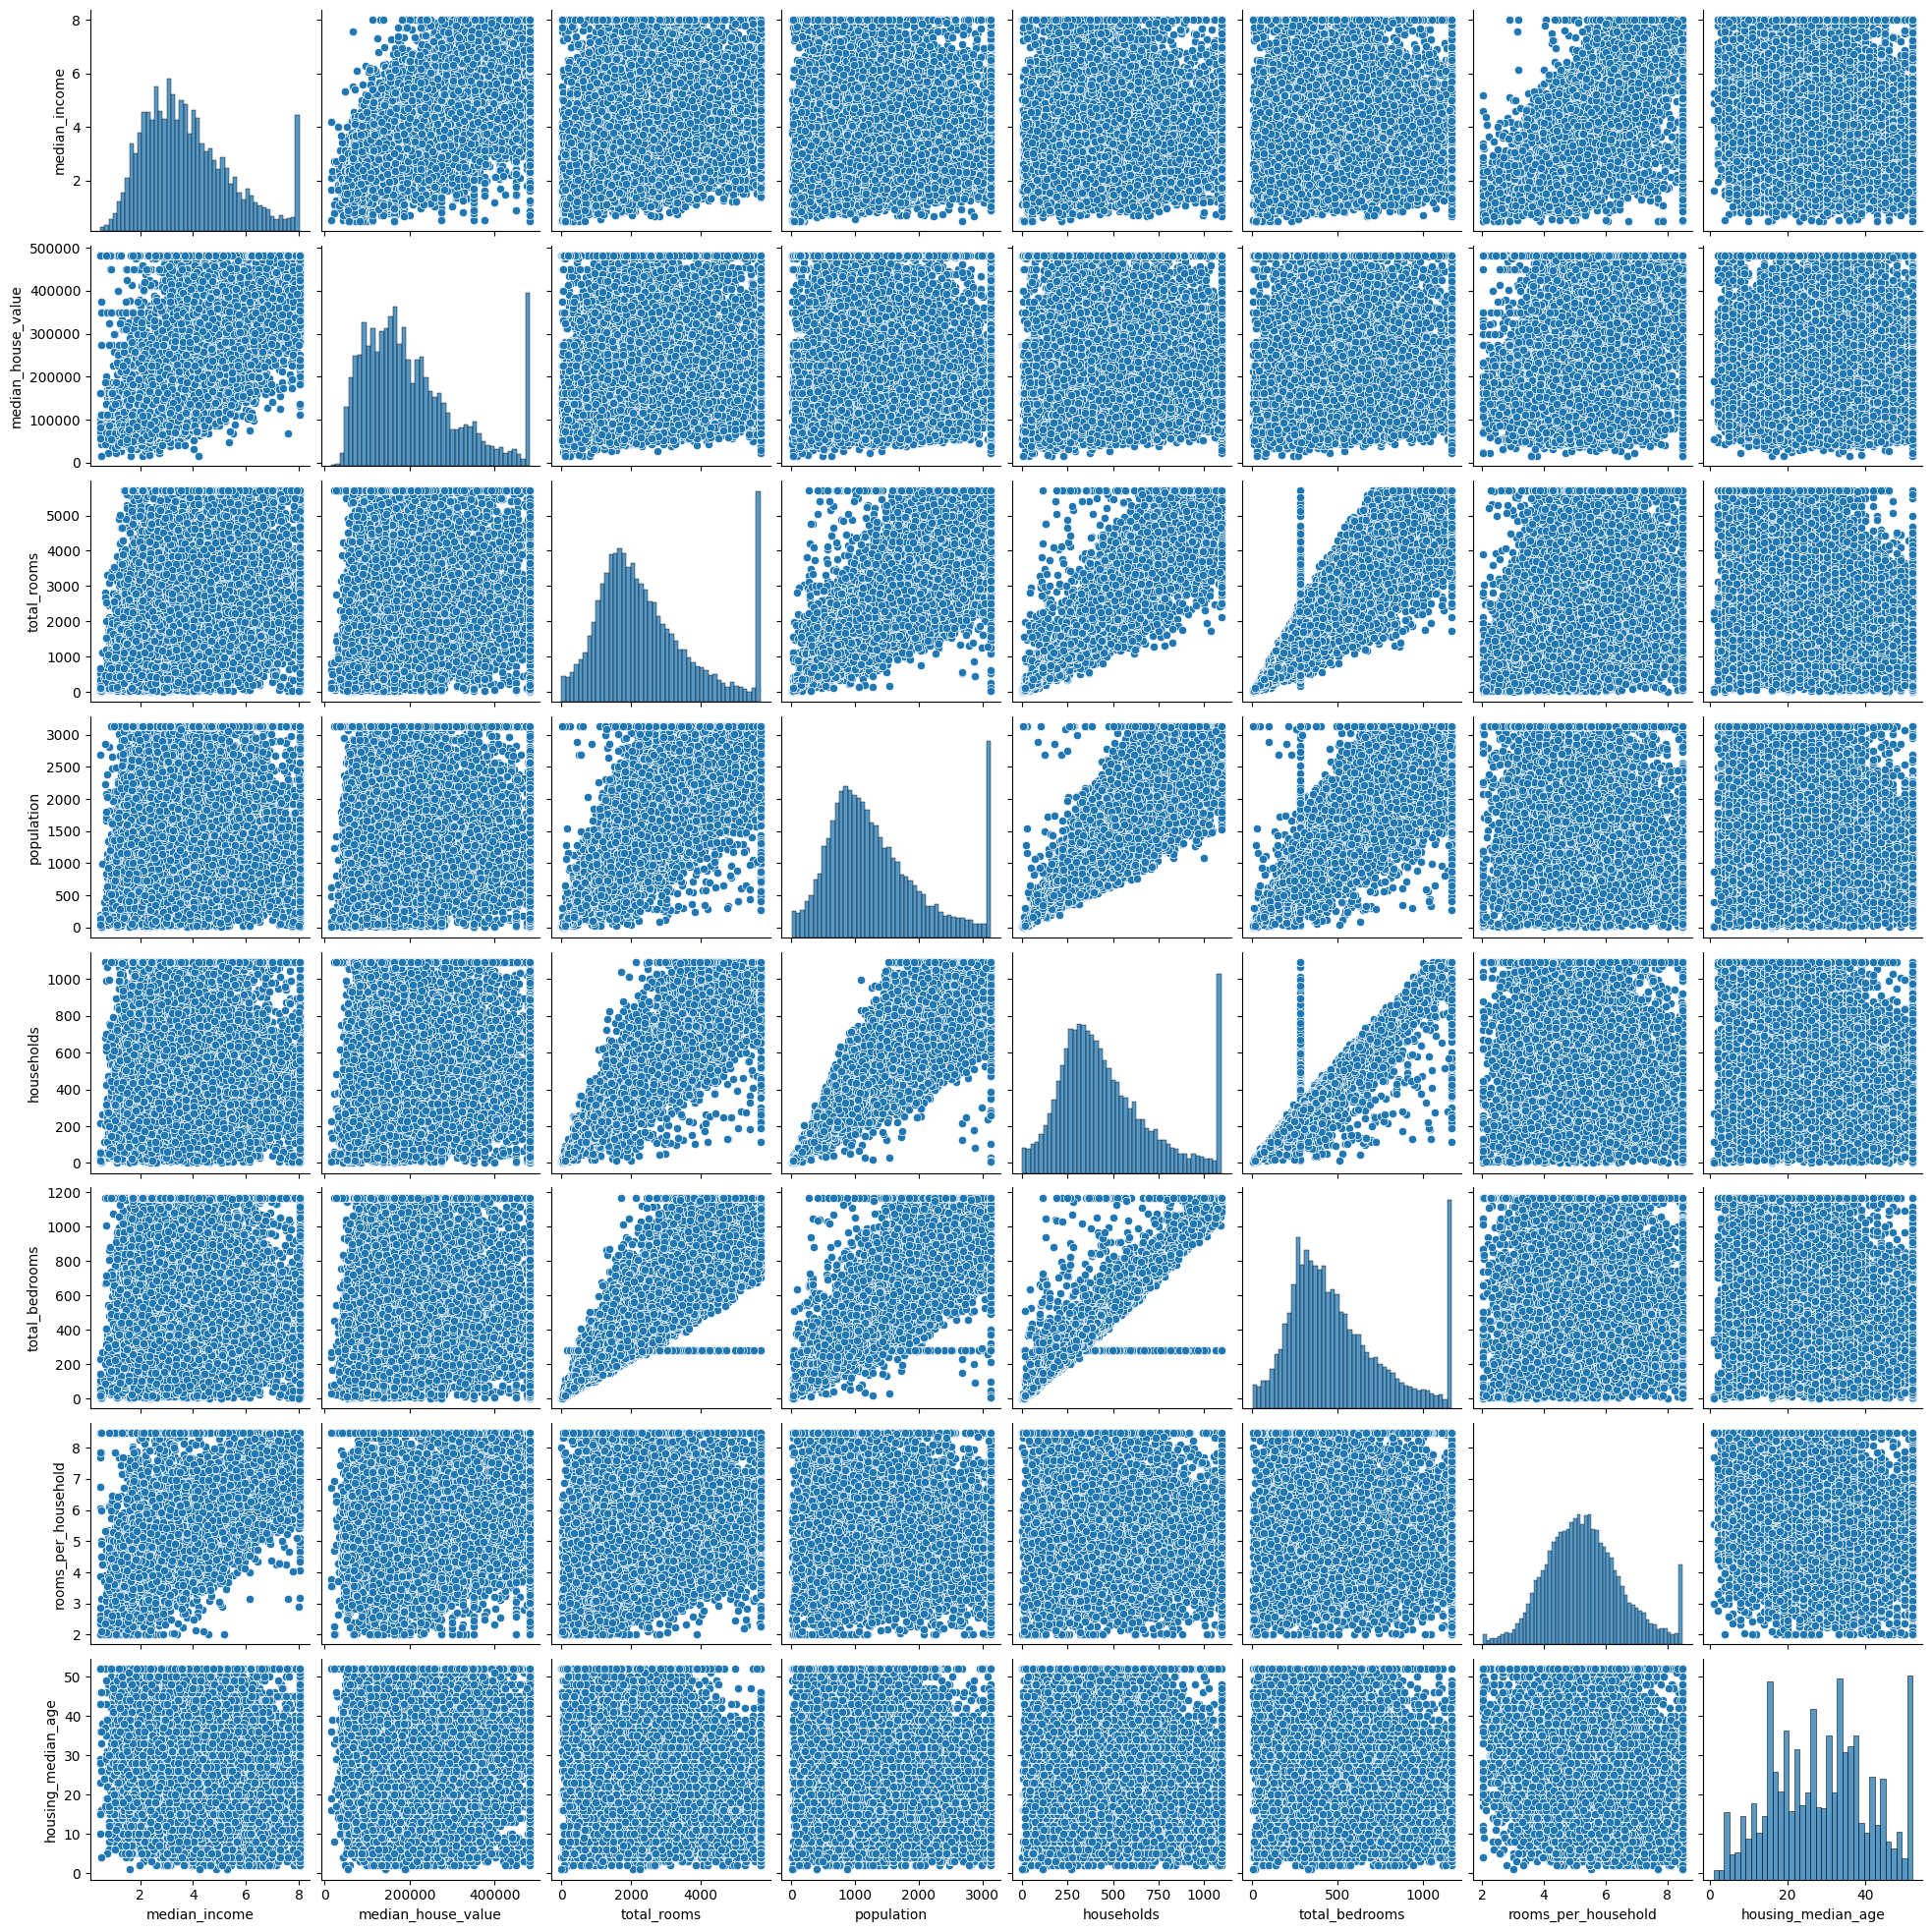

In [ ]:
sns.pairplot(df1[['median_income', 'median_house_value', 'total_rooms', 'population', 'households', 'total_bedrooms', 'rooms_per_household', 'housing_median_age']])
plt.show()

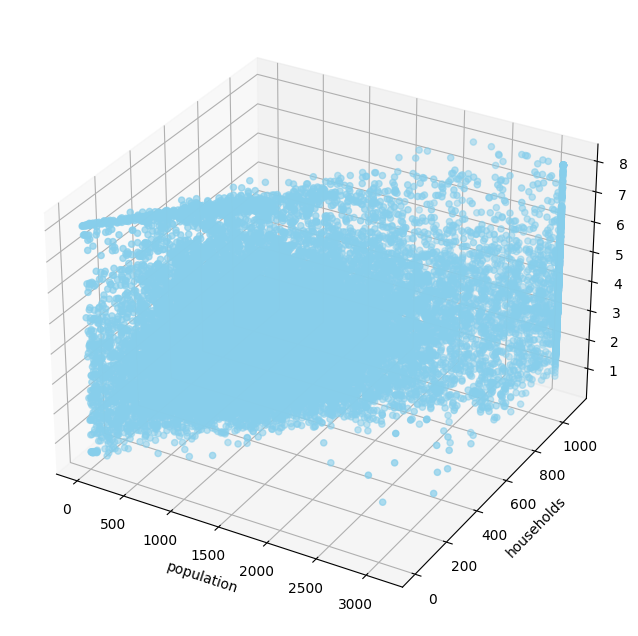

In [ ]:
#Visualizing the relationship between Height, Length and Rings of Abalone in a 3D space
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure (figsize=(16,8))
ax = plt.axes (projection='3d')
ax.set_xlabel('population')
ax.set_ylabel('households')
ax.set_zlabel ('median_income')
ax.scatter3D (df1['population'], df1['households'], df1['median_income'], c='skyblue')
plt.show()

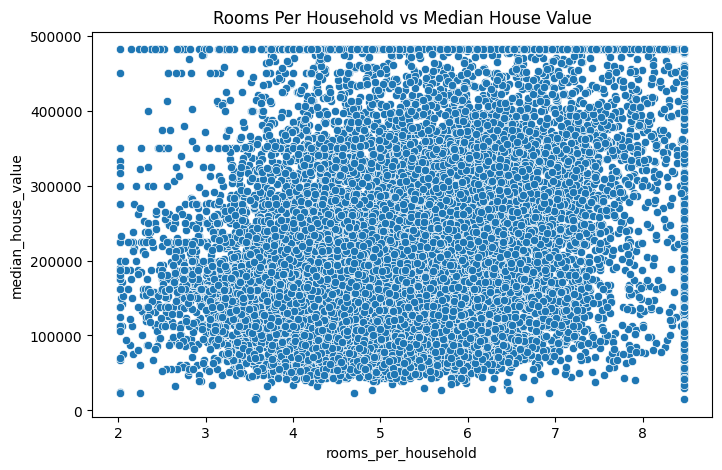

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='rooms_per_household', y='median_house_value', data=df1)
plt.title('Rooms Per Household vs Median House Value')
plt.show()

Feature Scaling

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

# Assuming your dataframe is called df and you want to scale all columns except 'ID' and categorical variables
features_to_scale = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'rooms_per_household', 'rooms_per_person', 'ocean_proximity_encoded']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
df1[features_to_scale] = scaler.fit_transform(df1[features_to_scale])

# Check the scaled data
print(df1.head())

   housing_median_age  total_rooms  total_bedrooms  population  households  \
0            0.982143    -1.117285       -1.297520   -1.325821   -1.291972   
1           -0.607019     2.329936        2.118499    1.389936    2.348314   
2            1.856182    -0.697327       -1.084237   -1.098528   -1.099883   
3            1.856182    -0.835405       -0.926898   -1.017539   -0.941691   
4            1.856182    -0.582857       -0.769558   -1.008395   -0.791033   

   median_income  median_house_value  rooms_per_household  rooms_per_person  \
0       2.541006            2.178330             1.347665          0.659647   
1       2.541006            1.347165             0.749027          0.854906   
2       2.085156            1.290635             2.394098          0.855758   
3       1.111288            1.195241             0.411358          0.267179   
4       0.027262            1.203191             0.784108          0.787681   

   ocean_proximity_encoded  
0                -0.976419 

In [ ]:
#Rechecking for null values
df1.isnull().sum()

housing_median_age         0
total_rooms                0
total_bedrooms             0
population                 0
households                 0
median_income              0
median_house_value         0
rooms_per_household        0
rooms_per_person           0
ocean_proximity_encoded    0
dtype: int64

Data Splitting

In [ ]:
#Splitting all the variables into features(x) and target variables(y)
x = df1.drop(['median_house_value'], axis=1)
y = df1['median_house_value']

In [ ]:
#Displaying the dimensionality of features
x.shape

(20640, 9)

In [ ]:
y.shape

(20640,)

In [ ]:
#Splitting the dataset into Training Set & Testing Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
#Displaying the dimentionality of X Training Set
X_train.shape

(14448, 9)

In [ ]:
#Displaying the dimentionality of X Testing Set
X_test.shape

(6192, 9)

In [ ]:
#Displaying the dimensionality of Y Training Set
y_train.shape

(14448,)

In [ ]:
#Displaying the dimentionality of Y Testing Set
y_test.shape

(6192,)

Model Selection

In [ ]:
#Multiple Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test)

# Evaluating the model
mse_mlr = mean_squared_error(y_test, y_pred)
r2_mlr = r2_score(y_test, y_pred)
rmse_mlr = np.sqrt(mean_squared_error(y_test,y_pred))
mae_mlr =  mean_absolute_error(y_test, y_pred)

# Printing the perofrmance metrics
print("Mean squared error:", mse_mlr)
print("R-squared:", r2_mlr)
print("RMSE:", rmse_mlr)
print("MAE:", mae_mlr)

# Getting the coefficients
coef = model.coef_
intercept = model.intercept_

# Printing the coefficients
print("\nCoefficients:", coef)
print("\nIntercept:", intercept)

Mean squared error: 0.3783843178331172
R-squared: 0.6168474429503426
RMSE: 0.6151295130564922
MAE: 0.45117034873842815

Coefficients: [ 0.16952332 -0.30164053  0.50050532 -0.33645002  0.1935882   0.82346175
 -0.10992504  0.05811767 -0.18622982]

Intercept: -0.004976751165842395


In [ ]:
#Lasso Regression Model
from sklearn.linear_model import Lasso

#Defining the model with desired hyperparameters
lasso = Lasso(alpha=0.1)

#Fitting the Lasso model on the training data
lasso.fit(X_train, y_train)

#Making predictions on the test data
y_pred = lasso.predict(X_test)

#Evaluating the model
mse_lasso = mean_squared_error(y_test, y_pred)
r2_lasso = r2_score(y_test, y_pred)
rmse_lasso = np.sqrt(mean_squared_error(y_test,y_pred))
mae_lasso =  mean_absolute_error(y_test, y_pred)

#Printing the perofrmance metrics
print("Mean squared error:", mse_lasso)
print("R-squared:", r2_lasso)
print("RMSE:", rmse_lasso)
print("MAE:", mae_lasso)

#Getting the coefficients
coef = lasso.coef_
intercept = lasso.intercept_

#Printting the coefficients
print("\nCoefficients:", coef)
print("\nIntercept:", intercept)

Mean squared error: 0.4447727789262613
R-squared: 0.549622382535316
RMSE: 0.6669128720652057
MAE: 0.5004415346408063

Coefficients: [ 0.04519831  0.          0.         -0.          0.          0.56876301
 -0.          0.         -0.18837082]

Intercept: 0.0004563302059151206


In [ ]:
# Defining the ridge model with desired hyperparameters
ridge = Ridge(alpha=1.0)

# Fitting the Ridge model on the training data
ridge.fit(X_train, y_train)

# Making predictions on the test data
y_pred = ridge.predict(X_test)

# Evaluating the model
mse_ridge = mean_squared_error(y_test, y_pred)
r2_ridge = r2_score(y_test, y_pred)
rmse_ridge = np.sqrt(mean_squared_error(y_test,y_pred))
mae_ridge =  mean_absolute_error(y_test, y_pred)

# Printing the perfrmance metrics
print("Mean squared error:", mse_ridge)
print("R-squared:", r2_ridge)
print("RMSE:", rmse_ridge)
print("MAE:", mae_ridge)

# Getting the coefficients
coef = ridge.coef_
intercept = ridge.intercept_

# Printing the coefficients
print("\nCoefficients:", coef)
print("\nIntercept:", intercept)

Mean squared error: 0.3783102978626159
R-squared: 0.6169223956892211
RMSE: 0.6150693439463683
MAE: 0.4511436076842932

Coefficients: [ 0.16949737 -0.3007902   0.49927207 -0.33631043  0.19387339  0.8232137
 -0.11003502  0.0581993  -0.18627554]

Intercept: -0.0049647604496609625


In [ ]:
#Random Forest Regression Model
forest_reg = RandomForestRegressor(random_state=42)

# Training the Random Forest Regression model
forest_reg.fit(X_train,y_train)

# Predicting the target for the testing set
y_pred = forest_reg.predict(X_test)

# Evaluating the model
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
mae_rf = mean_absolute_error(y_test, y_pred)

# Evaluating the performance on test set after hyperparameter tuning
print("MSE:", mse_rf)
print("R-squared:", r2_rf)
print("RMSE:", rmse_rf)
print("MAE:", mae_rf)

MSE: 0.2673192051659483
R-squared: 0.7293121512160865
RMSE: 0.5170292111340986
MAE: 0.3650634849948586


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Initialize the XGBoost Regressor
xgboost_reg = xgb.XGBRegressor(random_state=42)

# Fit the model on the training data
xgboost_reg.fit(X_train, y_train)

# Predict the target on the test set
y_pred = xgboost_reg.predict(X_test)

# Evaluate the model performance
mse_xgb = mean_squared_error(y_test, y_pred)
r2_xgb = r2_score(y_test, y_pred)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred)

# Print performance metrics
print("MSE:", mse_xgb)
print("R-squared:", r2_xgb)
print("RMSE:", rmse_xgb)
print("MAE:", mae_xgb)



MSE: 0.28514320393937065
R-squared: 0.7112635419449731
RMSE: 0.5339880185354074
MAE: 0.3768963339998572


In [ ]:
# Define the models and their performance metrics
models = {
    'Multiple Linear Regression': {
        'MSE': mse_mlr,
        'R-squared': r2_mlr,
        'RMSE': rmse_mlr,
        'MAE': mae_mlr
    },
    'Random Forest Regression': {
        'MSE': mse_rf,
        'R-squared': r2_rf,
        'RMSE': rmse_rf,
        'MAE': mae_rf
    },
    'Lasso Regression': {
        'MSE': mse_lasso,
        'R-squared': r2_lasso,
        'RMSE': rmse_lasso,
        'MAE': mae_lasso
    },
    'Ridge Regression': {
        'MSE': mse_ridge,
        'R-squared': r2_ridge,
        'RMSE': rmse_ridge,
        'MAE': mae_ridge
    },

    'XGBoost Regression': {
        'MSE': mse_xgb,
        'R-squared': r2_xgb,
        'RMSE': rmse_xgb,
        'MAE': mae_xgb
    }
}
# Create a DataFrame from the dictionary
model_metrics = pd.DataFrame.from_dict(models, orient='index')

# Print the summary table
print("Performance Metrics Summary:")
print(model_metrics)

Performance Metrics Summary:
                                 MSE  R-squared      RMSE       MAE
Multiple Linear Regression  0.378384   0.616847  0.615130  0.451170
Random Forest Regression    0.267319   0.729312  0.517029  0.365063
Lasso Regression            0.444773   0.549622  0.666913  0.500442
Ridge Regression            0.378310   0.616922  0.615069  0.451144
XGBoost Regression          0.285143   0.711264  0.533988  0.376896


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],          # Number of trees
    'max_depth': [None, 10, 20, 30],          # Maximum depth of trees
    'min_samples_split': [2, 5, 10],          # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],            # Minimum samples required to be at a leaf node
    'bootstrap': [True, False]                # Whether to use bootstrap samples
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=forest_reg, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error',
                           n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Output the best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)

# Use the best model from GridSearchCV
best_forest_reg = grid_search.best_estimator_

# Predict the target on the test set using the best model
y_pred = best_forest_reg.predict(X_test)

# Evaluate the model performance
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred)

# Print performance metrics
print("MSE:", mse_rf)
print("R-squared:", r2_rf)
print("RMSE:", rmse_rf)
print("MAE:", mae_rf)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming your features are in X and target variable is in y
X = df1.drop('median_house_value', axis=1)  # Feature matrix
y = df1['median_house_value']  # Target variable

# Initialize the model (example: RandomForestRegressor)
model = RandomForestRegressor()

# Set up KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store the evaluation metrics for each fold
mse_scores = []
rmse_scores = []
mae_scores = []
r2_scores = []

# Perform cross-validation manually to calculate each metric
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append metrics for each fold
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)

# Convert lists to numpy arrays for easier calculations
mse_scores = np.array(mse_scores)
rmse_scores = np.array(rmse_scores)
mae_scores = np.array(mae_scores)
r2_scores = np.array(r2_scores)

# Print the results for each fold and their averages
print("Average MSE:", mse_scores.mean())
print("Average RMSE:", rmse_scores.mean())
print("Average MAE:", mae_scores.mean())
print("Average R²:", r2_scores.mean())


Average MSE: 0.28584998580023846
Average RMSE: 0.5345598445970707
Average MAE: 0.37893207671135676
Average R²: 0.7139905654874558
